In [2]:
import os
from pprint import *
import pandas as pd
import numpy as np
import seaborn as sns
from dateutil import parser
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
channels = pd.read_csv('../csv/channels.csv', index_col=0)
videos = pd.read_csv('../csv/videos.csv', index_col = 0, sep =';')

In [4]:
channels = channels[channels.channelId != "UCCCPCZNChQdGa9EkATeye4g"]
videos = videos[videos.channelId != "UCCCPCZNChQdGa9EkATeye4g"]

In [5]:
videos_m = pd.merge(videos, channels, left_on="channelId", right_on="channelId", how="left")

In [6]:
videos_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11555 entries, 0 to 11554
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   channelId         11555 non-null  object 
 1   videoId           11555 non-null  object 
 2   tn_url            11555 non-null  object 
 3   publishedAt_x     11555 non-null  object 
 4   publishedYear     11555 non-null  float64
 5   publishedMonth    11555 non-null  float64
 6   publishedDay      11555 non-null  float64
 7   publishedWeekday  11555 non-null  float64
 8   publishedHour     11555 non-null  float64
 9   title_x           11555 non-null  object 
 10  duration          11555 non-null  object 
 11  viewCount_x       11555 non-null  int64  
 12  likeCount         11435 non-null  float64
 13  commentCount      11522 non-null  float64
 14  color_1_r         11555 non-null  float64
 15  color_1_g         11555 non-null  float64
 16  color_1_b         11555 non-null  float6

## Compute engagement per video

In [7]:
videos_m = videos_m.rename(columns={
    'publishedAt_x': 'publishedAt_video',
    'title_x': 'title_video',
    'viewCount_x': 'viewCount_video',
    'title_y': 'title_channel',
    'viewCount_y': 'viewCount_channel'
}
)

In [8]:
videos_m = videos_m.assign(
    #engagement_1 = (((videos_m.likeCount + videos_m.commentCount) / videos_m.videoCount) / videos_m.subscriberCount) * 100,
    engagement = ((videos_m.likeCount + videos_m.commentCount) / videos_m.subscriberCount) * 100,
    #engagement_3 = (((videos_m.likeCount + videos_m.commentCount + videos_m.viewCount_video) / videos_m.videoCount) / videos_m.subscriberCount) * 100,
    #engagement_4 = ((videos_m.likeCount + videos_m.commentCount + videos_m.viewCount_video) / videos_m.subscriberCount) * 100,
    #engagement_5 = (videos_m.viewCount_video + videos_m.likeCount + videos_m.commentCount) / videos_m.subscriberCount
    
) 

In [9]:
videos_m
df = videos_m.groupby('channelId').mean()

In [10]:
df = df[['engagement']]
channels = pd.merge(channels, df, left_on="channelId", right_on="channelId", how="left")

In [11]:
channels.assign(
    viewPerSubs = channels.viewCount / channels.subscriberCount
)

,channelId,title,publishedAt,viewCount,subscriberCount,videoCount,engagement,viewPerSubs
0,UCYpRDnhk5H8h16jpS84uqsA,Le Monde,2006-03-17T14:41:41Z,310639457,1320000,2055,0.504242,235.332922
1,UCSKdvgqdnj72_SLggp7BDTg,Brut,2016-10-28T12:43:30Z,537272835,1400000,6028,0.413746,383.766311
2,UCewhc0fvja891XkpIPGRMxQ,LCI,2015-06-17T14:23:07Z,164788340,507000,3416,0.387106,325.026312
3,UC1ObaaFz4XHVPN2T5IFsU4w,L'Obs,2006-10-02T20:49:21Z,169434054,268000,6836,0.211810,632.216619
4,UCfHn_8-ehdem86fEvlFg-Gw,Le Parisien,2014-10-06T16:42:09Z,844038565,808000,9011,0.467927,1044.602184
5,UCyIV8rkza5Uk_sJIhqilBvQ,L'ÉQUIPE,2013-02-28T18:07:07Z,132364578,504000,9856,0.216240,262.628131
6,UCpi-4daExRSchtsJzO06rwA,Quotidien,2016-09-07T09:05:05Z,119647060,478000,273,1.218650,250.307657
7,UCAcAnMF0OrCtUep3Y4M-ZPw,HugoDécrypte - Actus du jour,2015-11-19T19:48:59Z,265596633,1580000,967,1.135491,168.099135
8,UCvrNoLkkDgcFrLV2oX8mbEg,TVMag,2006-07-17T18:16:05Z,6861437,34000,399,0.243123,201.806971
9,UCCDz_XYeKWd0OIyjp95dqyQ,Figaro Live,2006-05-21T15:43:59Z,246857172,435000,10553,0.137004,567.487752


<AxesSubplot:xlabel='color_1_r', ylabel='engagement'>

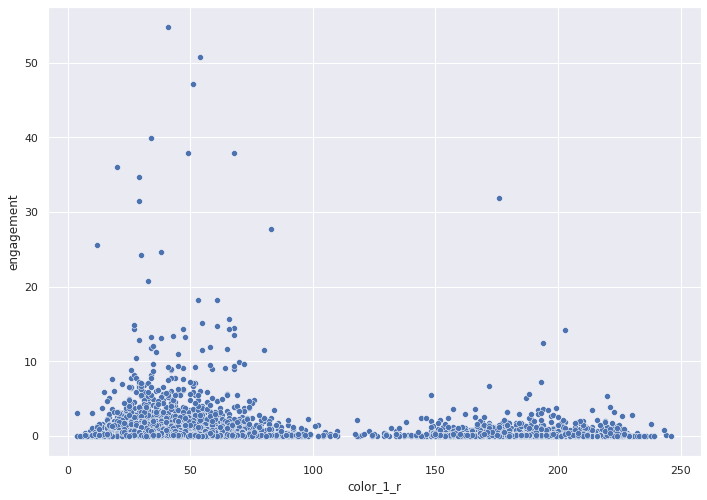

In [15]:
sns.scatterplot(x="color_1_r", y="engagement",data=videos_m)

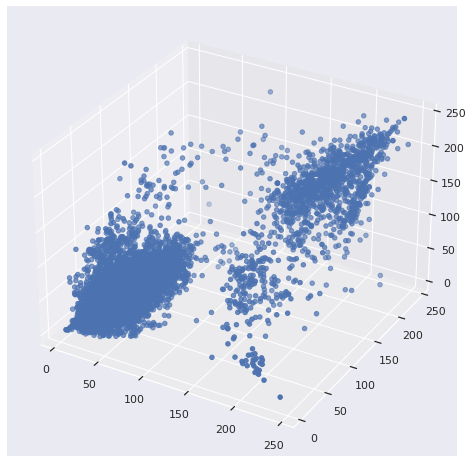

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = videos_m['color_1_r']
y = videos_m['color_1_g']
z = videos_m['color_1_b']

ax.scatter(x, y, z)

plt.show()

## Colors

In [17]:
from colormap import rgb2hex

In [18]:
videos_m.iloc[:1,:]

,channelId,videoId,tn_url,publishedAt_video,publishedYear,publishedMonth,publishedDay,publishedWeekday,publishedHour,title_video,...,color_2_b,color_3_r,color_3_g,color_3_b,title_channel,publishedAt_y,viewCount_channel,subscriberCount,videoCount,engagement
0,UCYpRDnhk5H8h16jpS84uqsA,6_o8EwK-m7o,https://i.ytimg.com/vi/6_o8EwK-m7o/default.jpg,2022-06-03T16:16:46Z,2022.0,6.0,3.0,4.0,18.0,🔴 Stade de France : comment l’organisation de ...,...,158.0,150.0,150.0,145.0,Le Monde,2006-03-17T14:41:41Z,310639457,1320000,2055,0.168712


In [19]:
from scipy.spatial import KDTree
from webcolors import (CSS3_HEX_TO_NAMES,hex_to_rgb)

def convert_rgb_to_names(rgb_tuple):
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []    
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)    
    distance, index = kdt_db.query(rgb_tuple)
    return f'{names[index]}'

In [20]:
from tqdm import *

In [21]:
teinte_to_color = {
    'dimgray': 'gray',
    'rosybrown': 'pink',
    'silver':'gray',
    'darkolivegreen': 'green',
    'midnightblue': 'blue',
    'darkgray': 'gray',
    'lightgray':'gray',
    'sienna': 'brown',
    'darksalmon': 'brown',
    'peru': 'brown',
    'maroon':'brown',
    'paleturquoise': 'turquoise',
    'mediumturquoise':'turquoise',
    'tan':'brown',
    'burlywood': 'beige',
    'wheat': 'beige',
    'darkgreen': 'green',
    'darkslateblue': 'purple',
    'sandybrown': 'orange',
    'darkkhaki': 'green',
    'teal': 'blue',
    'gainsboro': 'gray',
    'skyblue': 'blue',
    'lightslategray': 'gray',
    'thistle': 'purple',
    'indianred': 'red',
    'lavender': 'purple',
    'steelblue':'blue',
    'cornflowerblue': 'blue',
    'darkseagreen': 'green',
    'chocolate': 'brown',
    'royalblue': 'blue',
    'lightsteelblue': 'blue',
    'saddlebrown': 'brown',
    'olivedrab': 'green',
    'powderblue': 'blue',
    'cadetblue': 'blue',
    'whitesmoke': 'white',
    'goldenrod': 'gold',
    'darkgoldenrod': 'gold',
    'antiquewhite':'beige',
    'coral': 'pink',
    'palevioletred': 'purple',
    'firebrick': 'red',
    'linen': 'beige',
    'forestgreen': 'green',
    'lightseagreen': 'turquoise',
    'mediumaquamarine': 'turquoise',
    'crimson': 'red',
    'limegreen':'green',
    'plum':'purple',
    'lightcoral': 'pink',
    'blanchedalmond': 'beige',
    'khaki': 'green',
    'lightskyblue': 'blue',
    'lightpink':'pink',
    'seagreen': 'turquoise',
    'slateblue':'blue',
    'lightblue':'blue',
    'mistyrose': 'pink',
    'yellowgreen': 'green',
    'salmon': 'pink',
    'peachpuff': 'beige',
    'bisque': 'beige',
    'mediumpurple': 'purple',
    'mediumvioletred': 'purple',
    'mediumorchid': 'purple',
    'tomato': 'red',
    'lightgreen': 'green',
    'orchid': 'purple',
    'aquamarine': 'turquoise',
    'lightcyan': 'turquoise',
    'dodgerblue': 'blue',
    'darkmagenta': 'purple',
    'olive':'green',
    'mediumseagreen': 'green',
    'darkred': 'red',
    'darkcyan': 'turquoise',
    'deepskyblue':'blue',
    'darkturquoise': 'turquoise',
    'mediumslateblue': 'purple',
    'darkorchid': 'purple',
    'palegoldenrod': 'gold',
    'moccasin': 'beige',
    'navajowhite': 'beige',
    'mediumspringgreen': 'turquoise',
    'springgreen': 'green',
    'cyan':'turquoise',
    'mediumblue': 'blue',
    'magenta': 'purple',
    'orangered': 'orange',
    'darkslategray' :'gray',
    'black': 'black',
    'slategray':'gray',
    'gray': 'gray',
    'turquoise':'turquoise',
    'brown':'brown',
    'pink':'pink',
    'green':'green',
    'blue': 'blue',
    'orange':'orange',
    'beige':'beige',
    'red':'red',
    'yellow':'yellow',
    'gold':'gold',
    'purple':'purple'
}

In [22]:
df_hex_colors = pd.DataFrame()
for video_id in tqdm(videos_m.videoId.unique()):
    c1h = convert_rgb_to_names((
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_1_r),
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_1_g),
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_1_b)
    ))
    c2h = convert_rgb_to_names((
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_2_r),
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_2_g),
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_2_b)
    ))
    c3h = convert_rgb_to_names((
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_3_r),
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_3_g),
        int(videos_m.loc[videos_m.videoId==video_id].iloc[0].color_3_b)
    ))
    data = {'videoId':video_id,'color_1_name':teinte_to_color[c1h],'color_2_name':teinte_to_color[c2h],
            'color_3_name':teinte_to_color[c3h]}
                                         
    df_hex_colors = df_hex_colors.append(data,ignore_index=True)

100%|████████████████████████████████████| 11540/11540 [01:28<00:00, 130.03it/s]


In [33]:
df_hex_colors

,videoId,color_1_name,color_2_name,color_3_name
0,6_o8EwK-m7o,gray,pink,gray
1,YKeP0l1VGzE,gray,gray,gray
2,NeFjybzGbzc,black,gray,gray
3,LrCCjX4i76I,black,gray,gray
4,7K1mPMaIkM0,black,gray,gray
...,...,...,...,...
11535,KMJKo-Gp_5A,gray,gray,gray
11536,R5wgH9JYOMc,gray,purple,gray
11537,XIrbpycPqCc,gray,purple,blue
11538,4qeaKO9zJGs,gray,brown,blue


In [32]:
from pathlib import Path
filepath = Path('../csv/videos_colors.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_hex_colors.to_csv(filepath,sep=";", index=False) 

<AxesSubplot:xlabel='count', ylabel='color_1_name'>

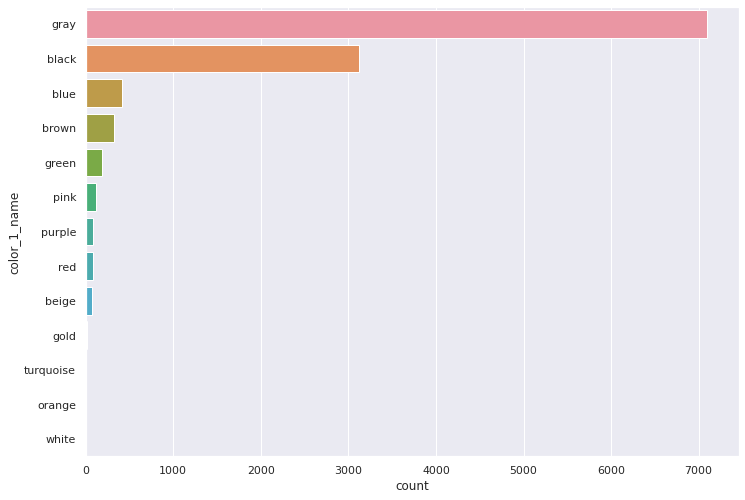

In [24]:
sns.countplot(
    y = df_hex_colors.color_1_name,
    order = df_hex_colors['color_1_name'].value_counts().index
)

<AxesSubplot:xlabel='count', ylabel='color_2_name'>

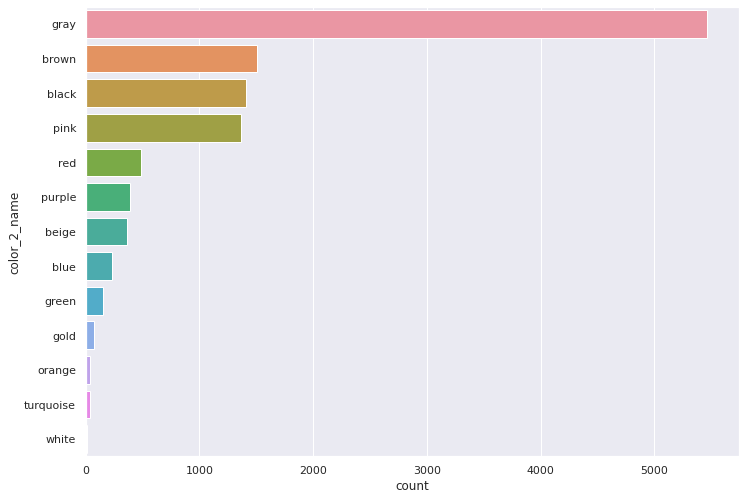

In [25]:
sns.countplot(
    y = df_hex_colors.color_2_name,
    order = df_hex_colors['color_2_name'].value_counts().index
)

In [26]:
sns.countplot(
    y = df_hex_colors.color_3_name,
    order = df_hex_colors['color_3_name'].value_counts().index
)

<AxesSubplot:xlabel='count', ylabel='color_3_name'>

Error in callback <function flush_figures at 0x7f797b969160> (for post_execute):


KeyboardInterrupt: 

In [27]:
videos = pd.merge(videos_m, df_hex_colors, left_on="videoId", right_on="videoId", how="left")

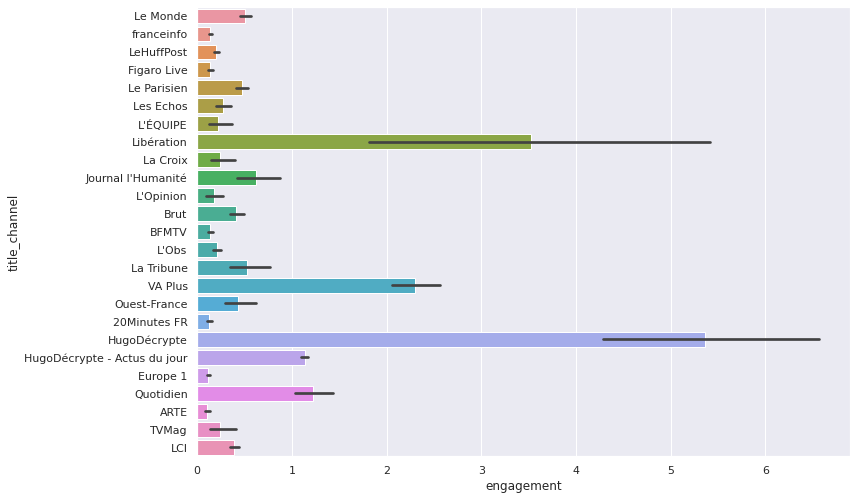

In [28]:
ax = sns.barplot(y="title_channel", x="engagement", data=videos)

In [29]:
def removing_numbers(text):
    return ''.join([i for i in text if not i.isdigit()])
import emoji
import regex

def is_emoji(s):
    return s in UNICODE_EMOJI

def extract_emojis(text):
    
    emoji_list = []
    data = regex.findall(r'\X', text)
    flags = regex.findall(u'[\U0001F1E6-\U0001F1FF]', text) 
    data = text.split()
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return len(emoji_list )#+ flags)

def number_caplock_words(text):
    text = text.replace("’", " ")
    text = text.replace("'", " ")
    text = text.replace(",", " ")
    text = text.replace("!", " ")
    text = text.replace("?", " ")
    text = text.replace(".", " ")
    text = text.replace("/", " ")
    text = text.replace("\n", " ")
    text = text.replace("(", " ")
    text = text.replace(")", " ")
    text = text.split()
    text
    c = 0
    for word in text:
        #print(word)
        if word.isupper():
            c += 1
    return c 

from collections import Counter
import re

def number_hastags(text):
    lst = [text]
    hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(lst), re.I))
    return len(dict(hash_counts).keys())

def number_punctuation(text):
    count = 0;  
    str = text  
    for i in range (0, len (str)):   
        #Checks whether given character is a punctuation mark  
        if str[i] in ('!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?"):  
            count = count + 1
    return count

def number_diff_words(text):
    list_of_words = text.split()
    list_of_words = [''.join(e for e in word if e.isalnum()) for word in list_of_words]
    list_of_words = [word for word in list_of_words if word]
    list_of_words = list(set(list_of_words))
    return len(list_of_words)

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def number_sentances(text):
    number_of_sentences = sent_tokenize(text)

    return len(number_of_sentences)

def number_words(text):
    return len(text.split())

import re
def remove_emojis(data):
    data = data.replace("\n", " ")
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

[nltk_data] Downloading package punkt to /home/romain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11555 entries, 0 to 11554
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channelId          11555 non-null  object 
 1   videoId            11555 non-null  object 
 2   tn_url             11555 non-null  object 
 3   publishedAt_video  11555 non-null  object 
 4   publishedYear      11555 non-null  float64
 5   publishedMonth     11555 non-null  float64
 6   publishedDay       11555 non-null  float64
 7   publishedWeekday   11555 non-null  float64
 8   publishedHour      11555 non-null  float64
 9   title_video        11555 non-null  object 
 10  duration           11555 non-null  object 
 11  viewCount_video    11555 non-null  int64  
 12  likeCount          11435 non-null  float64
 13  commentCount       11522 non-null  float64
 14  color_1_r          11555 non-null  float64
 15  color_1_g          11555 non-null  float64
 16  color_1_b          115

In [31]:
l = []
for i in tqdm(videos.index):
    l.append(extract_emojis(removing_numbers(videos.iloc[i]['title'])))
videos['nb_emojis_title'] = l

  0%|                                                 | 0/11555 [00:00<?, ?it/s]


KeyError: 'title'

In [ ]:
l = []
for i in tqdm(videos.index):
    l.append(number_diff_words(remove_emojis(videos.iloc[i]['title'])))

videos['nb_diff_words_title'] = l

In [ ]:
l = []
for i in tqdm(videos.index):
    l.append(number_sentances(remove_emojis(videos.iloc[i]['title'])))

videos['nb_sent_title'] = l

In [ ]:
l = []
for i in tqdm(videos.index):
    l.append(number_words(remove_emojis(videos.iloc[i]['title'])))

videos['nb_words_title'] = l

In [ ]:
l = []
for i in tqdm(videos.index):
    l.append(number_hastags(remove_emojis(videos.iloc[i]['title'])))

videos['nb_hashtags_title'] = l

In [ ]:
l = []
for i in tqdm(videos.index):
    l.append(number_punctuation(remove_emojis(videos.iloc[i]['title'])))

videos['nb_punct_title'] = l

In [ ]:
videos["emojis_prop_title"] = videos['nb_emojis_title'] / videos['nb_words_title']
videos["sent_prop_title"] = videos['nb_sent_title'] / videos['nb_words_title']
videos["diff_words_prop_title"] = videos['nb_diff_words_title'] / videos['nb_words_title']
videos["hashtags_prop_title"] = videos['nb_hashtags_title'] / videos['nb_words_title']
videos["punct_prop_title"] = videos['nb_punct_title'] / videos['nb_words_title']

In [ ]:
df = videos_m.groupby('channelId').mean()
df.reset_index()

In [ ]:
channels = pd.merge(channels, df, left_on="channelId", right_on="channelId", how="left")

In [ ]:
channels

In [ ]:
from pathlib import Path
filepath = Path('../csv/channels_global.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
channels.to_csv(filepath,sep=";", index=False) 

In [ ]:
color_df = videos.dropna()
color_df = color_df.assign(
    eng = pd.qcut(color_df['engagement'], 4, labels=False)
)
color_PCA = color_df[[
                        'color_1_r','color_1_g','color_1_b',
                       'color_2_r','color_2_g','color_2_b',
                        'color_3_r','color_3_g','color_3_b',
    
                     
                     ]]

In [ ]:
df_hex_colors.color_1_name = teinte_to_color[df_hex_colors.color_1_name]

In [ ]:
from sklearn.preprocessing import StandardScaler

sns.set(rc={'figure.figsize':(15,10)})

cls = PCA(n_components=3)
pcs = cls.fit_transform(color_PCA)

colorPCA = pd.DataFrame(pcs, columns=["Comp1", "Comp2", "Comp3"])
colorPCA.index = color_df.index
colorPCA['eng'] = color_df.eng

sns.scatterplot(x = "Comp1", y = "Comp2", hue='eng',data = colorPCA)

In [ ]:
cls.components_

In [ ]:
cls.explained_variance_ratio_

In [ ]:
def kmeans_dataset(dataset, n_clusters_list, strategies, tries):
    for n_clusters in n_clusters_list:
        for strategy in strategies:
            for rs in range(tries): # On utilisera `rs` pour fixer le `random_state`

                inertia = (
                  KMeans(
                    n_clusters=n_clusters,
                    n_init=1,
                    random_state=rs,
                    init=strategy,
                  )
                  .fit(dataset)
                  .inertia_
                )
                yield rs, strategy, n_clusters, inertia

In [ ]:
gen = kmeans_dataset(color_PCA, range(1, 15), ["k-means++"], 20)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
sns.lineplot(
x="n_clusters",
y="inertia",
data=df.loc[df.init == "k-means++"],
err_style="bars",
ci="sd",
)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)


In [ ]:
cls = AgglomerativeClustering(linkage="ward", affinity="euclidean", distance_threshold=3, n_clusters=None)
cls.fit(color_PCA)
plot_dendrogram(cls)

In [ ]:
import matplotlib as mpl
from scipy.stats import norm
from scipy import linalg
from sklearn.decomposition import PCA


def scatterplot_pca(
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, labels = None, **kwargs
):
    """Diagramme de dispersion dans le premier plan principal.

    Permet d'afficher un diagramme de dispersion lorsque les données
    ont plus de deux dimensions. L'argument `columns` spécifie la
    liste des colonnes à utiliser pour la PCA dans le jeu de données
    `data`. Les arguments `style` et `hue` permettent de spécifier la
    forme et la couleur des marqueurs. Les arguments `pc1` et `pc2`
    permettent de sélectionner les composantes principales (par défaut
    la première et deuxième). Retourne l'objet `Axes` ainsi que le
    modèle `PCA` utilisé pour réduire la dimension.

    :param columns: Les colonnes quantitatives de `data` à utiliser
    :param hue: La colonne de coloration
    :param style: La colonne du style
    :param data: Le dataFrame Pandas
    :param pc1: La composante en abscisse
    :param pc2: La composante en ordonnée

    """
     # Select relevant columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions if needed
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **kwargs)
    
    #add_labels(data_pca[f"PC{pc1}"], data_pca[f"PC{pc2}"], labels) 
    return ax, pca


def plot_clustering(data, clus1, clus2=None, ax=None, **kwargs):
    """Affiche les données `data` dans le premier plan principal.

    :param data: Le dataFrame Pandas
    :param clus1: Un premier groupement
    :param clus2: Un deuxième groupement
    :param ax: Les axes sur lesquels dessiner

    """

    if ax is None:
        ax = plt.gca()

    other_kwargs = {e: kwargs.pop(e) for e in ["centers", "covars"] if e in kwargs}

    ax, pca = scatterplot_pca(data=data, hue=clus1, style=clus2, ax=ax, **kwargs)

    if "centers" in other_kwargs and "covars" in other_kwargs:
        # Hack to get colors
        # TODO use legend_out = True
        levels = [str(l) for l in np.unique(clus1)]
        hdls, labels = ax.get_legend_handles_labels()
        colors = [
            artist.get_facecolor().ravel()
            for artist, label in zip(hdls, labels)
            if label in levels
        ]
        colors = colors[: len(levels)]

        if data.shape[1] == 2:
            centers_2D = other_kwargs["centers"]
            covars_2D = other_kwargs["covars"]
        else:
            centers_2D = pca.transform(other_kwargs["centers"])
            covars_2D = [
                pca.components_ @ c @ pca.components_.T for c in other_kwargs["covars"]
            ]

        p = 0.9
        sig = norm.ppf(p ** (1 / 2))

        for covar_2D, center_2D, color in zip(covars_2D, centers_2D, colors):
            v, w = linalg.eigh(covar_2D)
            v = 2.0 * sig * np.sqrt(v)

            u = w[0] / linalg.norm(w[0])
            if u[0] == 0:
                angle = np.pi / 2
            else:
                angle = np.arctan(u[1] / u[0])

            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(center_2D, v[0], v[1], 180.0 + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)

    return ax, pca




import numpy as np
import numpy.linalg as linalg
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array


class AdaptiveKMeans(ClusterMixin, BaseEstimator):
    def __init__(self, n_clusters=8, n_init=10, tol=1e-4, max_iter=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, X):
        X = check_array(X)

        n, p = X.shape
        n_init = self.n_init
        n_clusters = self.n_clusters
        max_iter = self.max_iter
        tol = self.tol

        centers_opt = None
        Vt_opt = None
        partition_opt = None
        d_opt = float("inf")

        for i in range(n_init):
            # Initialisation des centres des classes avec
            # `np.random.choice`
            # <answer>
            centers = np.random.choice(n, size=n_clusters, replace=False)
            centers = X[centers, :]
            # </answer>

            # Initialisation des matrices de variance--covariance
            # brutes et normalisées
            # <answer>
            Vt = [np.eye(p) for i in range(n_clusters)]
            Vt_norm = [np.eye(p) for i in range(n_clusters)]
            # </answer>

            step = tol + 1
            it = 0

            while step > tol and it < max_iter:
                old_centers = centers

                # Calcul d'une nouvelle partition
                dist = np.concatenate(
                    [
                        cdist(c[None, :], X, metric="mahalanobis", VI=linalg.inv(V))
                        for c, V in zip(centers, Vt_norm)
                    ]
                )
                partition = np.argmin(dist, axis=0)

                # Mise à jour des paramètres
                for k in range(n_clusters):
                    # Extraction des individus de class k
                    # <answer>
                    Xk = X[partition == k, :]
                    # </answer>

                    # On évite les groupements dégénérés (trop peu de
                    # points pour inverser la matrice de
                    # variance--covariance empirique)
                    if Xk.shape[0] >= p:
                        # Calcul du k-ième centre
                        # <answer>
                        centers[k, :] = np.mean(Xk, axis=0)
                        # </answer>

                        # Calcul de la k-ième matrice de
                        # variance-covariance normalisée avec `np.cov` et
                        # `linalg.det`
                        # <answer>
                        c = np.cov(Xk, bias=True, rowvar=False)

                        # Régularisation de la matrice de covariance :
                        # on grossit la diagonale pour la rendre
                        # inversible quoi qu'il arrive.
                        c += 1e-5 * np.eye(c.shape[0])

                        Vt[k] = c
                        Vt_norm[k] = (linalg.det(c)) ** (-1 / p) * c
                        # </answer>

                step = ((old_centers - centers) ** 2).sum()
                it += 1

            # Calcul de `d_tot`. On pourra s'inspirer des instructions
            # permettant de calculer `dist` (voir plus haut).
            # <answer>
            d_tot = sum(
                (
                    cdist(
                        c[None, :],
                        X[partition == k, :],
                        metric="mahalanobis",
                        VI=linalg.inv(V),
                    )
                    ** 2
                ).sum()
                for k, (c, V) in enumerate(zip(centers, Vt_norm))
            )
            # </answer>

            # Mise à jour du modèle optimal si besoin
            if d_tot < d_opt:
                centers_opt = centers
                Vt_opt = Vt
                Vt_norm_opt = Vt_norm
                partition_opt = partition
                d_opt = d_tot

        self.labels_ = partition_opt
        self.cluster_centers_ = centers_opt
        self.covars_ = Vt_opt
        self.covars_norm_ = Vt_norm_opt
        self.d_opt = d_opt


In [ ]:
cls = AdaptiveKMeans(n_clusters=2, n_init=150)
cls.fit(color_PCA)
labels = pd.Series(cls.labels_, name="K-means")
ax,pca = plot_clustering(color_PCA, labels, centers=cls.cluster_centers_, covars=cls.covars_)

In [ ]:
color_df = color_df.assign(
    color_label = labels
)

In [ ]:
color_df = color_df.dropna()

In [ ]:
df = color_df.groupby('eng').mean()

In [ ]:
df = df[['color_1_r','color_1_g','color_1_b']]

## RGB to color name

In [ ]:
sns.boxplot(
    x = 'engagement',
    y = 'title_channel',
    data = videos_m
)

In [ ]:
ax = sns.barplot(y="title_channel", x="engagement", data=videos_m)

In [ ]:
ax = sns.barplot(y="title_channel", x="engagement", data=videos_m[videos_m.title_channel != "HugoDécrypte"], estimator=min )

In [ ]:
ax = sns.barplot(y="title_channel", x="engagement", data=videos_m, estimator=max)

In [ ]:
def add_labels(x, y, labels, ax=None):
    """Ajoute les étiquettes `labels` aux endroits définis par `x` et `y`."""

    if ax is None:
        ax = plt.gca()
    for x, y, label in zip(x, y, labels):
        ax.annotate(
            label, [x, y], xytext=(10, -5), textcoords="offset points",
        )

    return ax

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
channelquant = channels[["publishedAt","viewCount","subscriberCount", "videoCount",'engagement']]
channelquant.publishedAt = channelquant.publishedAt.str[:4]
channelquant.publishedAt = channelquant.publishedAt.astype(int)
channelquant

In [ ]:
channelquant.assign(
    viewCount = channelquant.viewCount / channelquant.subscriberCount
)

In [ ]:
channelquantSS = StandardScaler().fit_transform(channelquant)

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

cls = PCA(n_components=3)
pcs = cls.fit_transform(channelquantSS)

channelPCA = pd.DataFrame(pcs, columns=["Comp1", "Comp2", "Comp3"])
channelPCA.index = channelquant.index

sns.scatterplot(x = "Comp1", y = "Comp2", data = channelPCA)
add_labels(channelPCA['Comp1'], channelPCA['Comp2'], channels.title)

In [ ]:
cls.explained_variance_ratio_

In [ ]:
cls.components_

## K-MEANS OF DOOOM

In [ ]:
def scatterplot_pca(
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, labels = None, **kwargs
):
    """Diagramme de dispersion dans le premier plan principal.

    Permet d'afficher un diagramme de dispersion lorsque les données
    ont plus de deux dimensions. L'argument `columns` spécifie la
    liste des colonnes à utiliser pour la PCA dans le jeu de données
    `data`. Les arguments `style` et `hue` permettent de spécifier la
    forme et la couleur des marqueurs. Les arguments `pc1` et `pc2`
    permettent de sélectionner les composantes principales (par défaut
    la première et deuxième). Retourne l'objet `Axes` ainsi que le
    modèle `PCA` utilisé pour réduire la dimension.

    :param columns: Les colonnes quantitatives de `data` à utiliser
    :param hue: La colonne de coloration
    :param style: La colonne du style
    :param data: Le dataFrame Pandas
    :param pc1: La composante en abscisse
    :param pc2: La composante en ordonnée

    """
     # Select relevant columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions if needed
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **kwargs)
    
    if type(labels) != None:
        add_labels(data_pca[f"PC{pc1}"], data_pca[f"PC{pc2}"], labels) 
        
    return ax, pca

In [ ]:
type(channels.title)

In [ ]:
cls_K = KMeans(n_clusters=4, init="k-means++").fit(channelquantSS)

cls = PCA(n_components=3)
pcs = cls.fit_transform(channelquantSS)

channelPCA = pd.DataFrame(pcs, columns=["Comp1", "Comp2", "Comp3"])
channelPCA.index = channelquant.index

sns.scatterplot(x = "Comp1", y = "Comp2", hue = cls_K.labels_, data = channelPCA, palette = "tab10")
add_labels(channelPCA['Comp1'], channelPCA['Comp2'],  channels.title)

In [ ]:
def kmeans_dataset(dataset, n_clusters_list, strategies, tries):
    for n_clusters in n_clusters_list:
        for strategy in strategies:
            for rs in range(tries): # On utilisera `rs` pour fixer le `random_state`

                inertia = (
                  KMeans(
                    n_clusters=n_clusters,
                    n_init=1,
                    random_state=rs,
                    init=strategy,
                  )
                  .fit(dataset)
                  .inertia_
                )
                yield rs, strategy, n_clusters, inertia

In [ ]:
gen = kmeans_dataset(channelquantSS, range(1, 15), ["k-means++"], 20)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
sns.lineplot(
x="n_clusters",
y="inertia",
data=df.loc[df.init == "k-means++"],
err_style="bars",
ci="sd",
)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)


In [ ]:
cls = AgglomerativeClustering(linkage="ward", affinity="euclidean", distance_threshold=3, n_clusters=None)
cls.fit(channelquant)
plot_dendrogram(cls)

In [ ]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
X = pd.DataFrame(
    squareform(pdist(channelquant)),
    columns = channels.title,
    index = channels.title
)

In [ ]:
model = AgglomerativeClustering(
    linkage="ward", 
    affinity="euclidean", 
    distance_threshold=0, 
    n_clusters=None
).fit(X)

plot_dendrogram(model,color_threshold=1, labels=X.index,orientation="left")

In [ ]:
model = AgglomerativeClustering(
    affinity="precomputed", linkage="complete", n_clusters=4
).fit(X)

labels = model.labels_

aftd = MDS(n_components=2, dissimilarity="precomputed")
dist = aftd.fit_transform(X)

df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette":labels})

sns.scatterplot("x", "y", hue="étiquette", data=df,
               palette=['green','orange','red','blue'], legend='full')
add_labels(dist[:, 0], dist[:, 1], X.index)

# VIDEOOOOOS

In [ ]:
hdadj = videos_m[videos_m.title_channel == "HugoDécrypte - Actus du jour"]
hdadj = hdadj[hdadj.publishedYear == 2022]

In [ ]:
plt.xticks(rotation = 'vertical')
sns.lineplot(
    x = "publishedAt_video",
    y = "engagement",
    data = hdadj
)

# NLP

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import os
import sys
from tqdm import tqdm
import re
import pickle
import os
from pprint import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
print("No pre-computed stems found. Recomputing them...")
nltk.download('stopwords')
nltk.download("punkt")


titles = videos['title'].str.cat(sep=" ").lower()
tokens = re.split("; |, |-|\n|\(|\)| |&|\.\.\.|\?|!|¿|'|[0-9]|/|\.+|\+|#|%|\"|\*",titles)

print("Removing stopwords and stemming...")
snowball_stemmer = SnowballStemmer('french')
stemmed_tokens = [
    snowball_stemmer.stem(word) 
    for word in tokens
    if not word in stopwords.words() 
    and word != ''
    and len(word) > 1
]
stemmed_no_duplicates = np.unique(stemmed_tokens)

In [ ]:
with open('stemmed_no_duplicates.pckl', 'wb') as fp:
        pickle.dump(stemmed_no_duplicates, fp)
with open('stemmed_tokens.pckl', 'wb') as fp:
        pickle.dump(stemmed_tokens, fp)

In [ ]:
STEMS_PATH = "./stemmed_no_duplicates.pckl"
STEMS_WITH_DUP = "./stemmed_tokens.pckl"

print("Loading pre-computed stems...")

with open(STEMS_PATH,"rb") as f:
    stemmed_no_duplicates = pickle.load(f)
    
with open(STEMS_WITH_DUP,"rb") as f:
    stemmed_tokens = pickle.load(f)

In [ ]:
nltk.download('stopwords')
final_stopwords_list = stopwords.words('english') + stopwords.words('french')

tokens_filtered = [word for word in stemmed_tokens if not word in final_stopwords_list]
stemmed_tokens = tokens_filtered 


In [ ]:
stopwords_custom = ['deux', 'tout', 'tous', 'cette', 'cet', 'an', 'fait', "depuis", 'sans', 'afp', 'apres',\
                    'avant', 'bio','plus', 'où', 'ou', 'comment','grand','quotidien','arte','peut','etre','pourquoi',\
                   'jour','sous','nouveau','nouvel','être','veut','faut','buzz','fin','mag','foot','quand','quel','quelle',
                    'quelles','quels','coupe','image','images','imaginaire','magazine','imagination','cm','journal',
                   'journalisme','journaliste','journeaux','qualif','qualifications','qualificatif','saint','soir',
                   'express','film','selon','films','regard','regarder']

tokens_filtered = [word for word in stemmed_tokens if not word in stopwords_custom]
stemmed_tokens = tokens_filtered

In [ ]:
s = np.array(stemmed_tokens)
s = np.where(s == 'emmanuel', 'macron', s)
s = np.where(s == 'pen', 'lepen', s)
s = np.where(s == 'marin', 'lepen', s)
s = np.where(s == 'clément', 'viktorovitch', s)
s = np.where(s == 'ukrain', 'ukraine', s)
s = np.where(s == 'ukraine:', 'ukraine', s)
s = np.where(s == 'eric:', 'zemmour', s)

stemmed_tokens = s.tolist()

In [ ]:
for token in stemmed_tokens:
    if token == '«le':
        stemmed_tokens.remove('«le')
    if token == "d’un":
        stemmed_tokens.remove("d’un")

In [ ]:
s = pd.Series(stemmed_tokens)
s.value_counts()[:20]

In [ ]:
len(pd.Series(stemmed_tokens).unique())

In [ ]:
stem_counts = pd.Series(stemmed_tokens).value_counts()
#print(stem_counts[:60])
frequent_stems_counts = stem_counts[stem_counts >= 5]

from gensim.models import KeyedVectors

# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

# available_stems = []
stems_embeddings = []
for word in tqdm(list(frequent_stems_counts.index)):
    if word in model.key_to_index:
        # available_stems.append(word) 
        stems_embeddings.append(model[word])

#avail_freq_stems_counts = frequent_stems_counts[frequent_stems_counts.index.isin(model.key_to_index)]


stems_embeddings = np.array(stems_embeddings)
print("stems_embeddings shape =", stems_embeddings.shape)
avail_freq_stems_counts = frequent_stems_counts[:stems_embeddings.shape[0]]
print("their frequencies shape =", avail_freq_stems_counts.shape)

In [ ]:
cls = PCA(n_components=2)
pcs = cls.fit_transform(stems_embeddings)

nb_labels = 60
plt.figure(figsize=(20,15))
plt.scatter(pcs[:,0], pcs[:,1], alpha=0.2, s=avail_freq_stems_counts, c=avail_freq_stems_counts, cmap="coolwarm")
add_labels(pcs[:nb_labels, 0], pcs[:nb_labels, 1], avail_freq_stems_counts.index[:nb_labels])
plt.colorbar()
plt.savefig("frequent_stems.pdf")
plt.show()

In [ ]:
stems_embeddings

In [ ]:
nb_labels = 60
cls = AgglomerativeClustering(linkage="ward", affinity="euclidean", distance_threshold=3, n_clusters=None)
cls.fit(stems_embeddings)
plot_dendrogram(cls)

In [ ]:
embed = pd.DataFrame(stems_embeddings)

In [ ]:
nb_labels = 0
cls = KMeans(n_clusters=4, init="k-means++").fit(embed)
scatterplot_pca(
    hue=cls.labels_, data=embed, labels = avail_freq_stems_counts.index[:nb_labels]
)

In [ ]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
X = pd.DataFrame(
    squareform(pdist(embed)),
    columns = avail_freq_stems_counts.index,
    index = avail_freq_stems_counts.index
)
X

In [ ]:
model = AgglomerativeClustering(
    affinity="precomputed", linkage="complete", n_clusters=9
).fit(X)

labels = model.labels_

aftd = MDS(n_components=2, dissimilarity="precomputed")
dist = aftd.fit_transform(X)


In [ ]:
df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette":labels})
sns.scatterplot("x", "y", hue="étiquette", data=df, palette='deep')